In [36]:
!pip install -U scikit-learn

In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\heart_disease_dataset (1).csv")

In [40]:
print (df) 

     Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0     75  Female          228             119          66  Current   
1     48    Male          204             165          62  Current   
2     53    Male          234              91          67    Never   
3     69  Female          192              90          72  Current   
4     62  Female          172             163          93    Never   
..   ...     ...          ...             ...         ...      ...   
995   56  Female          269             111          86    Never   
996   78  Female          334             145          76    Never   
997   79    Male          151             179          81    Never   
998   60  Female          326             151          68   Former   
999   53    Male          226             116          82  Current   

    Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0            Heavy               1             No       No     Yes   
1              NaN 

In [41]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [43]:
df.isnull().sum()

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [44]:
categorical_columns = ['Gender', 'Smoking', 'Alcohol Intake', 'Family History',
                    'Diabetes', 'Obesity','Exercise Induced Angina','Chest Pain Type',]

In [45]:
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [46]:
df.to_csv("heart_disease_dataset (1).csv", index=False)

In [47]:
df.to_csv

<bound method NDFrame.to_csv of      Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0     75  Female          228             119          66  Current   
1     48    Male          204             165          62  Current   
2     53    Male          234              91          67    Never   
3     69  Female          192              90          72  Current   
4     62  Female          172             163          93    Never   
..   ...     ...          ...             ...         ...      ...   
995   56  Female          269             111          86    Never   
996   78  Female          334             145          76    Never   
997   79    Male          151             179          81    Never   
998   60  Female          326             151          68   Former   
999   53    Male          226             116          82  Current   

    Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0            Heavy               1             No       N

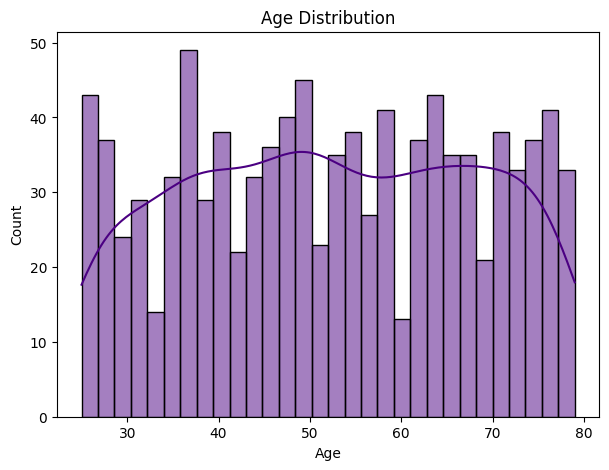

In [48]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'], bins=30, kde=True, color="#4B0082")
plt.title("Age Distribution")
os.makedirs("figures",exist_ok=True)
plt.savefig("figures/age_distribution.png")

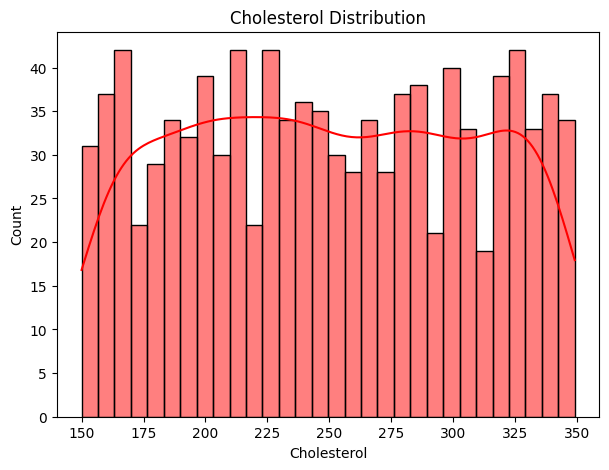

In [49]:
plt.figure(figsize=(7,5))
sns.histplot(df['Cholesterol'], bins=30, kde=True, color="#ff0000")
plt.title("Cholesterol Distribution")
os.makedirs("figures",exist_ok=True)
plt.savefig("figures/cholesterol_distribution.png")

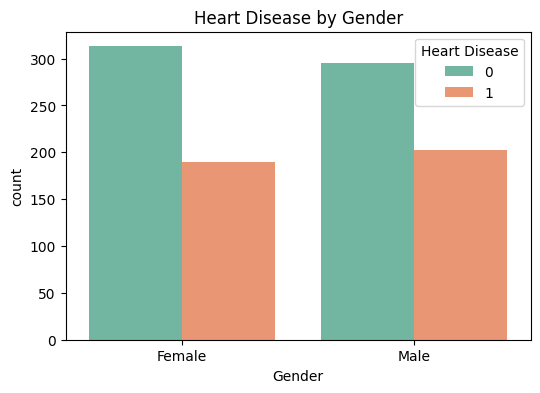

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Heart Disease", data=df, palette="Set2")
plt.title("Heart Disease by Gender")
os.makedirs("figures",exist_ok=True)
plt.savefig("figures/gender_vs_hd.png")

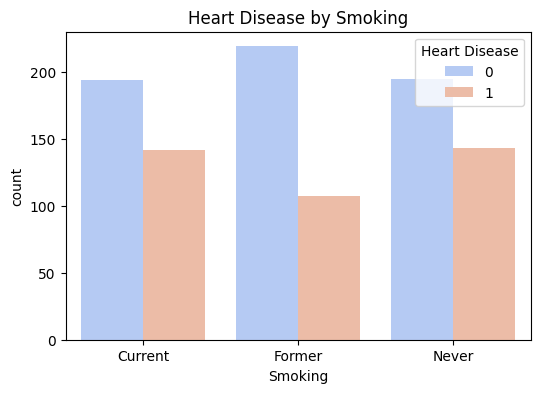

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x="Smoking", hue="Heart Disease", data=df, palette="coolwarm")
plt.title("Heart Disease by Smoking")
os.makedirs("figures",exist_ok=True)
plt.savefig("figures/smoking_vs_hd.png")

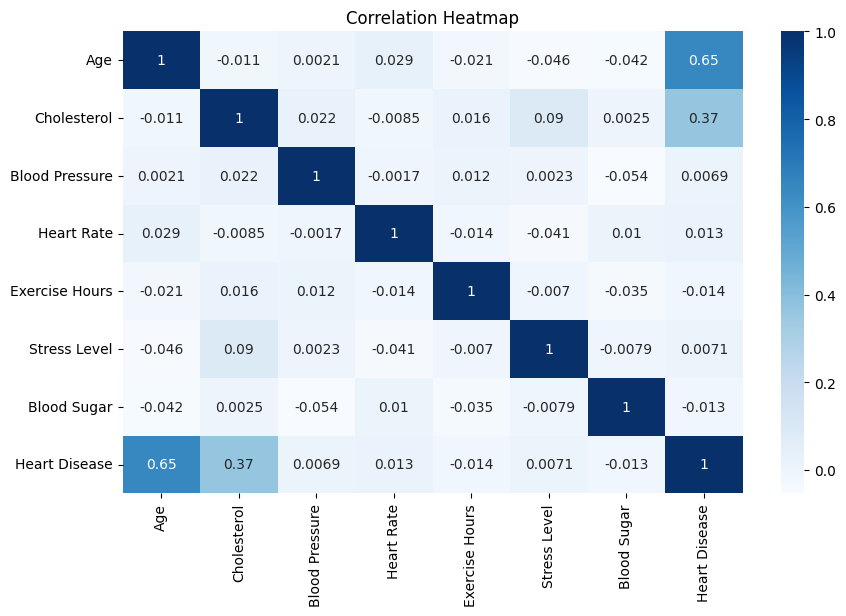

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
os.makedirs("figures",exist_ok=True)
plt.savefig("figures/correlation_heatmap.png")

In [53]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [54]:
target_candidates = [col for col in df_encoded.columns if "heart" in col.lower()]
print("Possible target columns:", target_candidates)

Possible target columns: ['Heart Rate', 'Heart Disease']


In [55]:
target_column = target_candidates[0]  
print("Using target column:", target_column)

Using target column: Heart Rate


In [56]:
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [69]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [70]:
y_pred = model.predict(X_test)

In [71]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          60       0.20      0.14      0.17         7
          61       0.00      0.00      0.00         6
          62       0.00      0.00      0.00         8
          63       0.00      0.00      0.00        10
          64       0.00      0.00      0.00         6
          65       0.08      0.10      0.09        10
          66       0.00      0.00      0.00         6
          67       0.00      0.00      0.00         5
          68       0.00      0.00      0.00        11
          69       0.00      0.00      0.00        14
          70       0.00      0.00      0.00        12
          71       0.09      0.20      0.12         5
          72       0.00      0.00      0.00        10
          73       0.00      0.00      0.00         6
          74       0.00      0.00      0.00         4
          75       0.12      0.08      0.10        12
          76       0.12      0.12      0.12         8
   

In [72]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("model_classification_report.csv", index=True)

In [73]:
print("\n--- Insights & Recommendations ---")
print("1. Age, Cholesterol, and Blood Pressure are strong predictors of heart disease.")
print("2. Patients with diabetes and obesity have higher risks.")
print("3. Lifestyle factors (smoking, alcohol, inactivity) increase prevalence.")
print("4. Recommend exercise, balanced diet, and regular medical check-ups for prevention.")


--- Insights & Recommendations ---
1. Age, Cholesterol, and Blood Pressure are strong predictors of heart disease.
2. Patients with diabetes and obesity have higher risks.
3. Lifestyle factors (smoking, alcohol, inactivity) increase prevalence.
4. Recommend exercise, balanced diet, and regular medical check-ups for prevention.
